In [2]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('titanic.csv')

In [3]:
genderList = ['1' if gender == 'male' else '0' for gender in data.iloc[:]['Sex'].values]
pclasslist = []
for i in data.iloc[:]['Pclass'].values:
    pclasslist.append(i)

In [4]:
agelist = []
for age in data.iloc[:]['Age']:
    if age < 18:
        agelist.append('1')
    elif age > 18 and age <=50:
        agelist.append('2')
    else:
        agelist.append('3')

In [5]:
data.rename(columns = {'Siblings/Spouses Aboard' : 'SiblingsSpousesAboard' }, inplace = True)
sslist = [ '1' if SiblingsSpousesAboard == 1 else '0' for SiblingsSpousesAboard in data.iloc[:]['SiblingsSpousesAboard'].values]

In [6]:
data.rename(columns = {'Parents/Children Aboard' : 'ParentsChildrenAboard' }, inplace = True)
plist = [ '0' if ParentsChildrenAboard == 0 else '1' for ParentsChildrenAboard in data.iloc[:]['ParentsChildrenAboard'].values]

In [7]:
farelist = []
for fare in data.iloc[:]['Fare'].values:
    if fare <= 50:
        farelist.append('0')
    elif fare > 50 and fare <= 200:
        farelist.append('1')
    else:
        farelist.append('2')
survivedlist = ['1' if Survived == 1 else '0' for Survived in data.iloc[:]['Survived'].values]

In [8]:
processed_data = pd.DataFrame()

In [9]:
processed_data['pclass'] = pclasslist
processed_data['gender'] = genderList
processed_data['age'] = agelist
processed_data['ssa'] = sslist
processed_data['pca'] = plist
# processed_data['fare'] = farelist
processed_data['survived'] = survivedlist

In [10]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [13]:
col_names = ['pclass', 'gender', 'age', 'ssa', 'pca', 'survived']
feature_cols = ['pclass', 'gender', 'age', 'ssa', 'pca']

In [14]:
X = processed_data[feature_cols]
y = processed_data.survived

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
feature_names = X.columns
labels = y.unique()

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7865168539325843


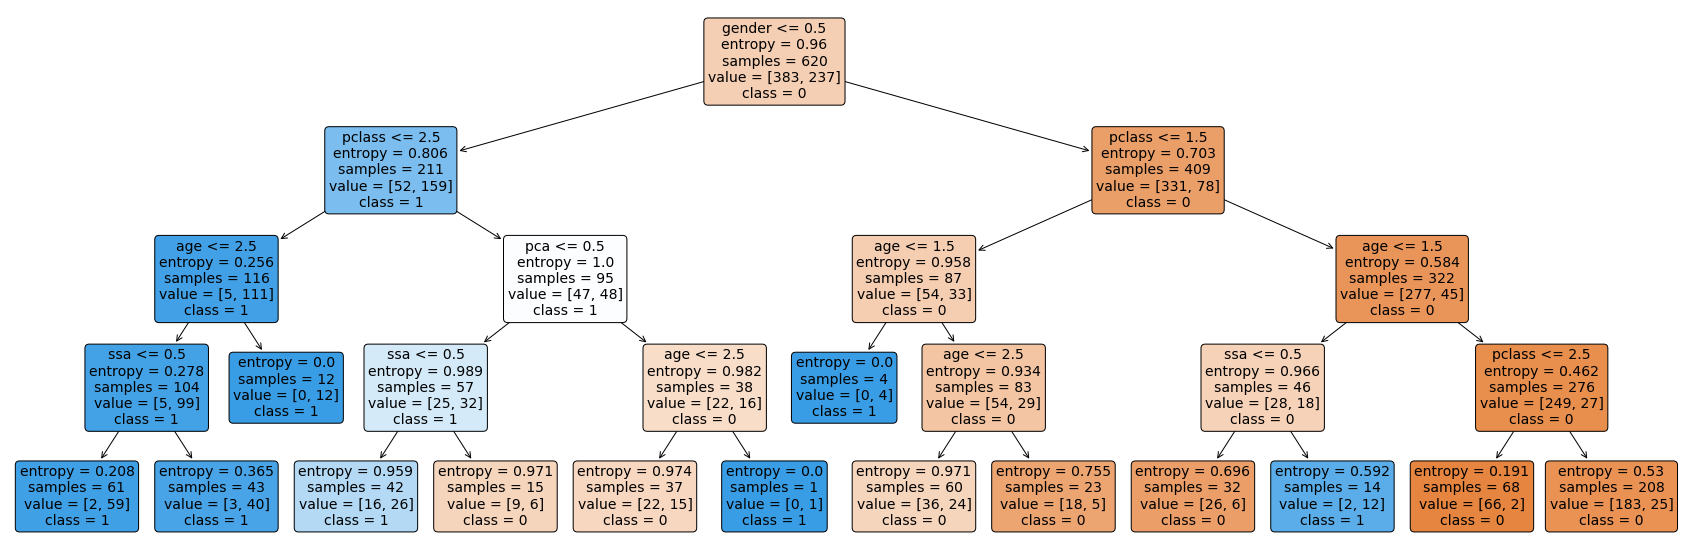

In [18]:
from sklearn import tree
import matplotlib.pyplot as plt
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='w')
#create the tree plot
a = tree.plot_tree(clf,feature_names = feature_names,class_names = labels,rounded = True,filled = True,fontsize=14)
#show the plot
plt.show()

In [3]:
from collections import Counter
df = pd.read_csv('processed_titanic.csv')
df.drop(['fare'],axis=1,inplace=True)
print(df)

def entropy(probs):  
    import math
    return sum( [-prob*math.log(prob, 2) for prob in probs] )

def entropy_of_list(a_list):
    cnt = Counter(x for x in a_list)
    num_instances = len(a_list)*1.0
    probs = [x / num_instances for x in cnt.values()]
    return entropy(probs)

total_entropy = entropy_of_list(df['survived'])

print("\n Total Entropy of titanic Data Set:",total_entropy)

     pclass     sex    age     ssa     pca survived
0     third    male  adult  ssayes   pcano       no
1     first  female  adult  ssayes   pcano      yes
2     third  female  adult   ssano   pcano      yes
3     first  female  adult  ssayes   pcano      yes
4     third    male  adult   ssano   pcano       no
..      ...     ...    ...     ...     ...      ...
882  second    male  adult   ssano   pcano       no
883   first  female  adult   ssano   pcano      yes
884   third  female  child  ssayes  pcayes       no
885   first    male  adult   ssano   pcano      yes
886   third    male  adult   ssano   pcano       no

[887 rows x 6 columns]

 Total Entropy of titanic Data Set: 0.9618806789594468


In [4]:
def information_gain(df, split_attribute_name, target_attribute_name, trace=0):
    df_split = df.groupby(split_attribute_name)
    nobs = len(df.index) * 1.0
    df_agg_ent = df_split.agg({target_attribute_name : [entropy_of_list, lambda x: len(x)/nobs] })[target_attribute_name]
    df_agg_ent.columns = ['Entropy', 'po']
    
    new_entropy = sum( df_agg_ent['Entropy'] * df_agg_ent['po'] )
    old_entropy = entropy_of_list(df[target_attribute_name])
    return old_entropy - new_entropy

def id3(df, target_attribute_name, attribute_names, default_class=None):
    cnt = Counter(x for x in df[target_attribute_name])# class of YES /NO
    if len(cnt) == 1:
        return next(iter(cnt))
    elif df.empty or (not attribute_names):
        return default_class 
    else:
        default_class = max(cnt.keys()) 
        gainz = [information_gain(df, attr, target_attribute_name) for attr in attribute_names] #
        index_of_max = gainz.index(max(gainz))
        best_attr = attribute_names[index_of_max]
        tree = {best_attr:{}} # Iniiate the tree with best attribute as a node 
        remaining_attribute_names = [i for i in attribute_names if i != best_attr]

        
        for attr_val, data_subset in df.groupby(best_attr):
            subtree = id3(data_subset,target_attribute_name,remaining_attribute_names,default_class)
            tree[best_attr][attr_val] = subtree
        return tree
    
attribute_names = list(df.columns)
print("List of Attributes:", attribute_names) 
attribute_names.remove('survived') #Remove the class attribute 
print("Predicting Attributes:", attribute_names)

List of Attributes: ['pclass', 'sex', 'age', 'ssa', 'pca', 'survived']
Predicting Attributes: ['pclass', 'sex', 'age', 'ssa', 'pca']


In [5]:
from pprint import pprint
tree = id3(df[:50],'survived',attribute_names)
print("\n\nThe Resultant Decision Tree is :\n")
pprint(tree)
attribute = next(iter(tree))
print("Best Attribute :\n",attribute)
print("Tree Keys:\n",tree[attribute].keys())



The Resultant Decision Tree is :

{'sex': {'female': {'pclass': {'first': 'yes',
                               'second': {'age': {'adult': {'ssa': {'ssano': 'yes',
                                                                    'ssayes': 'no'}},
                                                  'child': 'yes'}},
                               'third': {'age': {'adult': {'ssa': {'ssano': 'yes',
                                                                   'ssayes': {'pca': {'pcano': 'no',
                                                                                      'pcayes': 'yes'}}}},
                                                 'child': {'ssa': {'ssano': {'pca': {'pcano': 'yes',
                                                                                     'pcayes': 'no'}},
                                                                   'ssayes': {'pca': {'pcano': 'yes',
                                                                                  

In [6]:
def classify(instance, tree, default=None): 
    attribute = next(iter(tree))
    if instance[attribute] in tree[attribute].keys(): # Value of the attributs in  set of Tree keys  
        result = tree[attribute][instance[attribute]]
        if isinstance(result, dict):
            return classify(instance, result)
        else:
            return result # this is a label
    else:
        return default

In [7]:
df['predicted'] = df.apply(classify, axis=1, args=(tree,'No') )

print('Accuracy is: ' + str(sum(df['survived']==df['predicted']) / (1.0*len(df.index))))

Accuracy is: 0.6335963923337091
